In [34]:
#Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [35]:
#Read Csv File Data
df=pd.read_csv('C:/Users/rohan/Downloads/crime_data.csv')

In [36]:
#Reading only first 10 records
df=df.head(10)
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [37]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [38]:
df_norm=norm_func(df.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.702128,0.560000,0.232558,0.302395
1,0.475177,0.680000,0.000000,1.000000
2,0.340426,0.817778,0.744186,0.595808
3,0.390071,0.355556,0.046512,0.251497
4,0.404255,0.737778,1.000000,0.883234
5,0.326241,0.417778,0.697674,0.826347
6,0.000000,0.000000,0.674419,0.000000
7,0.184397,0.568889,0.558140,0.140719
8,0.858156,1.000000,0.744186,0.622754
9,1.000000,0.448889,0.279070,0.440120


In [39]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

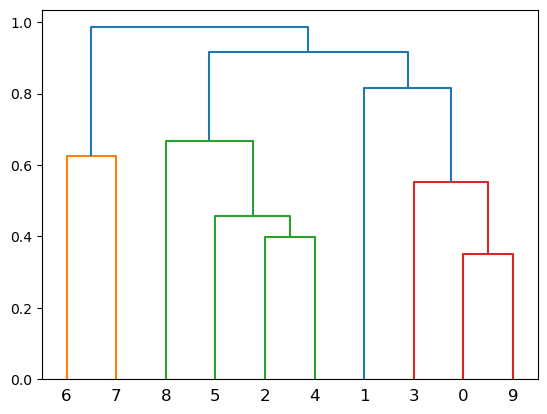

In [40]:
#Plot the Dedrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [41]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [42]:
#Fitting the data
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 0, 0], dtype=int64)

In [43]:
#Adding clustering to csv 
df_norm['h_clusterid']=hc.labels_
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.702128,0.560000,0.232558,0.302395,0
1,0.475177,0.680000,0.000000,1.000000,0
2,0.340426,0.817778,0.744186,0.595808,2
3,0.390071,0.355556,0.046512,0.251497,1
4,0.404255,0.737778,1.000000,0.883234,2
5,0.326241,0.417778,0.697674,0.826347,2
6,0.000000,0.000000,0.674419,0.000000,1
7,0.184397,0.568889,0.558140,0.140719,1
8,0.858156,1.000000,0.744186,0.622754,0
9,1.000000,0.448889,0.279070,0.440120,0


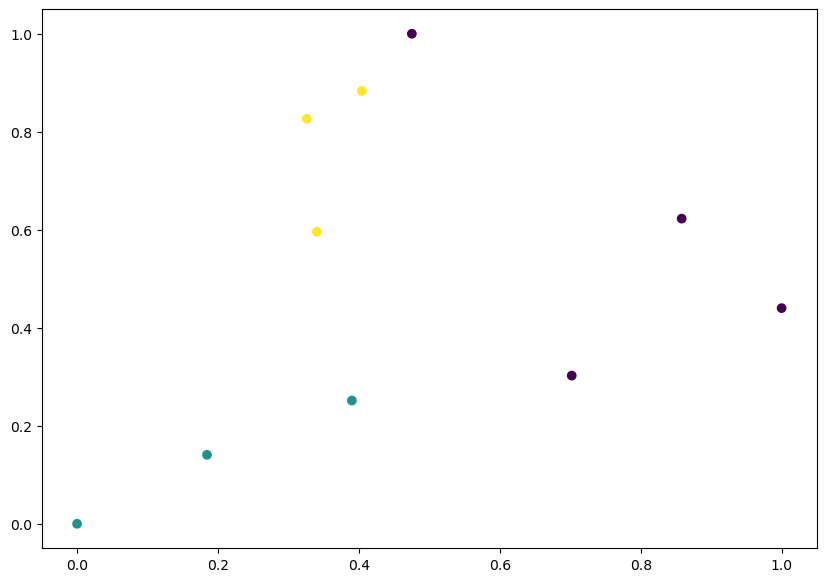

In [44]:
#Draw Scatter Plot
plt.figure(figsize=(10, 7))
plt.scatter(df_norm['Murder'],df_norm['Rape'], c=hc.labels_)